In [1]:
# Sigmoid function :
def sigmoid(x):
    #return 1/(np.identity(x.shape[0])+np.exp(-x))
    return 1/(1+np.exp(-x))

# Derivative of sigmoid function :
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

def sse(G,y,J):
    errorlist = np.zeros((len(y),1))
    
    for i in range (len(G)):
        for j in range (J):
            error=(1/2)*((G[i][j]-y[i,j])**2)
            errorlist[i]=error
        
    return np.mean(errorlist)


In [2]:
#question 1
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd


data = pd.read_csv('data_ffnn_3classes.txt', sep="\t", header=None)
data=np.array(data)
data=np.delete(data,0,0)

#print(data)
data=np.array(data, dtype=float)

X = data[:,:2] #toutes les infos jusqu'à la colonne 2 non inclus
x1 = data[:,0] #toutes les infos de la colonne 0
x2 = data[:,1]
y = data[:,2]
#print(x1)
#print(x2)


X=np.c_[np.ones(X.shape[0]), X]

#y = y.reshape(71,1)
y = np.c_[np.zeros(X.shape[0]), y]
y = np.c_[np.zeros(X.shape[0]), y]
y = np.c_[np.zeros(X.shape[0]), y]
for i in range (71):
    if y[i,3] == 0:
        y[i,0] = 1
    if y[i,3] == 1:
        y[i,1] = 1
    if y[i,3] == 2:
        y[i,2] = 1
y = y[:,0:3]


K=4
J=3

#the nb of hidden neurons is less than twice the size of the nodes of the input layers (if 1 output)
#Xbar = X car colonne de 1 deja implémentée

v = np.random.rand(X.shape[1],K)
w = np.random.rand(K+1,J)

[[ 1.96882429  0.74305646 -0.20397149  0.68685413]
 [-2.43572303  0.92649864  0.45078029  0.84023023]
 [ 2.98156426  1.19585359  0.14185383  0.52702575]]
[[-0.17103523 -0.64474336  0.81225354]
 [ 3.03075076  2.09495876 -5.32904744]
 [-0.07562334 -1.15593328  0.39211431]
 [-1.78626659  0.35741518  0.46861525]
 [-1.04641837 -0.90334798  0.85946838]]


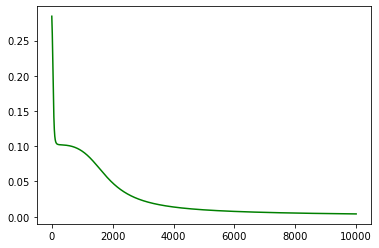

In [3]:
alpha = 0.001

#Gmax = G.argmax(axis=1)-1 #on l'utilise ou ?
Error =[]
for Itera in range(10000):

    
    Xbarbar=X.dot(v)
    
    F=sigmoid(Xbarbar)

    Fbar=np.c_[np.ones(F.shape[0]), F]

    Fbarbar=Fbar.dot(w)

    G=sigmoid(Fbarbar)
    
    Error.append(sse(G,y,J))


    #------------------------------------------------------------

    eccart = G - y
    dG_w = sigmoid_der(Fbarbar)
    derror_dw = np.dot(Fbar.T, eccart * dG_w)

    #------------------------------------------------------------

    eccart2 = eccart * dG_w
    dG_f =  np.dot(eccart2,w.T)
    dF_v =  sigmoid_der(Xbarbar)
    derror_dv = np.dot(X.T, dF_v * dG_f[:,1:])

    #------------------------------------------------------------

    v = v - alpha*derror_dv
    w = w - alpha*derror_dw

print (v)
print (w)
plt.plot(Error, c='g', label='SSE', linestyle='-')
plt.show()

In [4]:
Gmax = G.argmax(axis=1)#on l'utilise ou ?

print(sse(G,y,J))

print(G)
print(Gmax)

0.003911782178435505
[[0.5824615  0.42111104 0.05207382]
 [0.57997354 0.42176765 0.05224499]
 [0.55256632 0.42555594 0.05387234]
 [0.55963003 0.42226742 0.05436625]
 [0.44200921 0.3541614  0.10984774]
 [0.42394148 0.35219553 0.11534255]
 [0.53781773 0.4166156  0.05914048]
 [0.5292729  0.42493491 0.05691825]
 [0.56205469 0.42396453 0.05340493]
 [0.56375114 0.42385868 0.05318696]
 [0.54504101 0.42432421 0.05525582]
 [0.54186874 0.41081465 0.06106824]
 [0.59042052 0.42043128 0.05156707]
 [0.57496627 0.42228697 0.05251692]
 [0.56979162 0.42199937 0.05333968]
 [0.54914384 0.42576581 0.05421633]
 [0.53455769 0.42248874 0.05721109]
 [0.49055634 0.39513275 0.07540425]
 [0.49213315 0.38870954 0.07851873]
 [0.55366899 0.41894398 0.05634244]
 [0.61277897 0.41895719 0.05011384]
 [0.59689962 0.4199815  0.05133282]
 [0.60306462 0.41868356 0.05143135]
 [0.58625126 0.41623251 0.05402938]
 [0.5855529  0.41888478 0.05297511]
 [0.53746091 0.39782083 0.06755737]
 [0.42147066 0.32637635 0.13886823]
 [0.505

In [5]:
x1=np.array([[2,2],[4,4],[4.5,1.5]])
print(x1)

I=3

Xbar=np.c_[np.ones(x1.shape[0]), x1]   
Xbarbar=Xbar.dot(v)

F=sigmoid(Xbarbar)

Fbar=np.c_[np.ones(F.shape[0]), F]

Fbarbar=Fbar.dot(w)

G=sigmoid(Fbarbar)

Gmax = G.argmax(axis=1)
print(Gmax)
Error.append(sse(G,y,J))

[[2.  2. ]
 [4.  4. ]
 [4.5 1.5]]
[0 0 2]
